In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10, 6)
cwd = os.getcwd() #grabs current working directory

In [2]:
#alumina to aluminum
IAI_alumina_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/InternationalAluminumInst-1995-2021-PrimaryAluminaRefineEnergy-MJpTonne.csv",
                                     index_col='year')
#IAI_alumina_raw.head()

#Smelting energy
IAI_aluminumSmelt_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/InternationalAluminumInst-1995-2021-PrimaryAlSmeltEnergy-kWhpTonne.csv",
                                     index_col=['year','Type'])
#IAI_aluminumSmelt_raw.head()

In [3]:
IAI_alumina_kwhpkg = (IAI_alumina_raw*0.2777)/1000 #convert from MJ/tonne to kWh/kg
IAI_alumina_kwhpkg.loc[2001] = np.nan# drop the weirdness at 2001
IAI_alumina_kwhpkg.interpolate(inplace=True) #replace with interpolated data

Text(0.5, 1.0, 'Alumina Refining Energy')

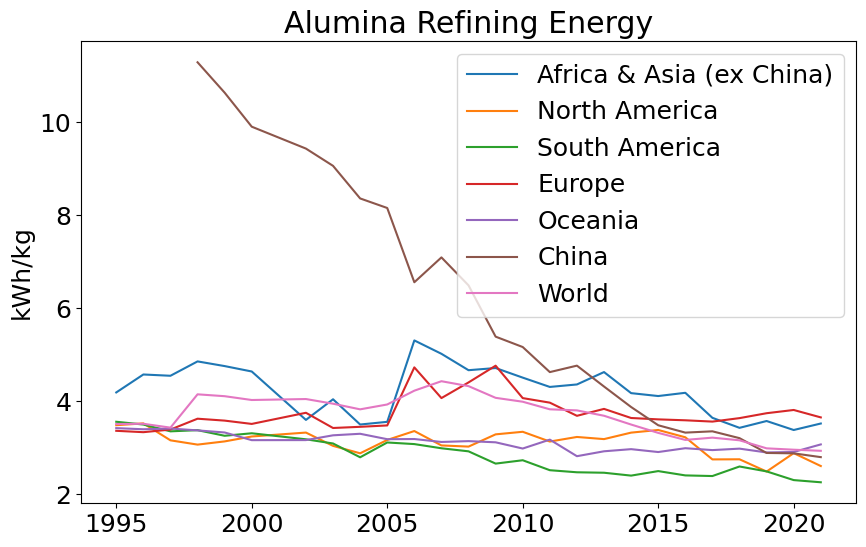

In [4]:
plt.plot(IAI_alumina_kwhpkg)
plt.legend(IAI_alumina_kwhpkg.columns)
plt.ylabel('kWh/kg')
plt.title('Alumina Refining Energy')

In [5]:
#we probably only want the total energy, as process energy is dc.
#IAI_aluminumSmelt_raw.loc[(slice(None),['Total Energy_ac']),:] #slice on the multilevel
#IAI_aluminumSmelt_totE = IAI_aluminumSmelt_raw[['World']].xs('Total Energy_ac', level=1) # slice on the multilevel, option to drop the type column
IAI_aluminumSmelt_totE = IAI_aluminumSmelt_raw.xs('Total Energy_ac', level=1) # slice on the multilevel, option to drop the type column
IAI_aluminumSmelt_totE.head()

,Africa,North America,South America,Asia (ex China),Europe,Oceania,Gulf Cooperation Council,China,World
year,,,,,,,,,
1995,15817.0,16048.0,15607.0,16114.0,15603.0,15238.0,NaN,16600,15878.0
1996,15238.0,15984.0,15678.0,15821.0,15440.0,15231.0,NaN,16065,15718.0
1997,15132.0,15985.0,15654.0,15765.0,15619.0,15187.0,NaN,15858,15711.0
1998,15084.0,15940.0,15958.0,15831.0,15548.0,15259.0,NaN,15473,15679.0
1999,15024.0,15371.0,15340.0,15323.0,15193.0,14852.0,NaN,15603,15282.0


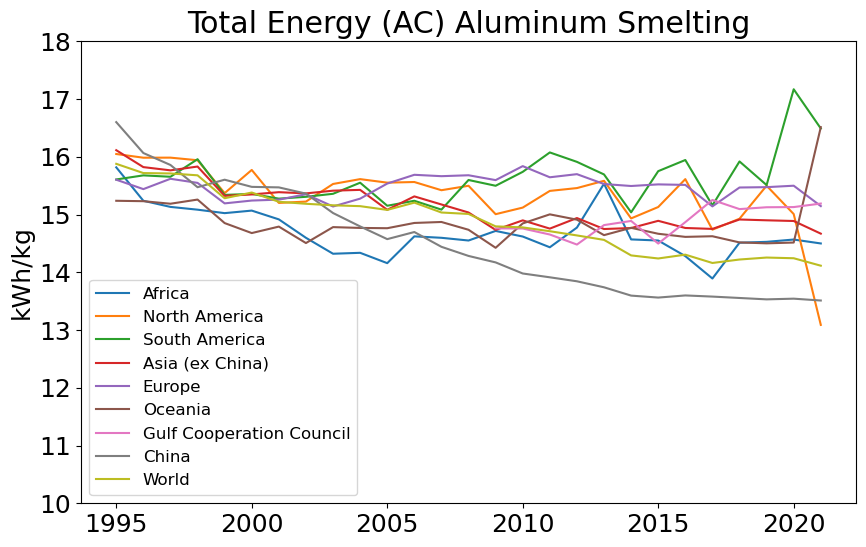

In [6]:
plt.plot(IAI_aluminumSmelt_totE/1000)
plt.title('Total Energy (AC) Aluminum Smelting')
plt.ylabel('kWh/kg')
plt.ylim(10,18)
plt.legend(IAI_aluminumSmelt_totE.columns, fontsize=12, loc='lower left')

In [7]:
#add these two processes together
IAI_alumina_kwhpkg_world = IAI_alumina_kwhpkg[['World']]
IAI_aluminumSmelt_totE_world = IAI_aluminumSmelt_totE[['World']]/1000
IAI_refinesmelt_world = IAI_alumina_kwhpkg_world + IAI_aluminumSmelt_totE_world

(10.0, 22.0)

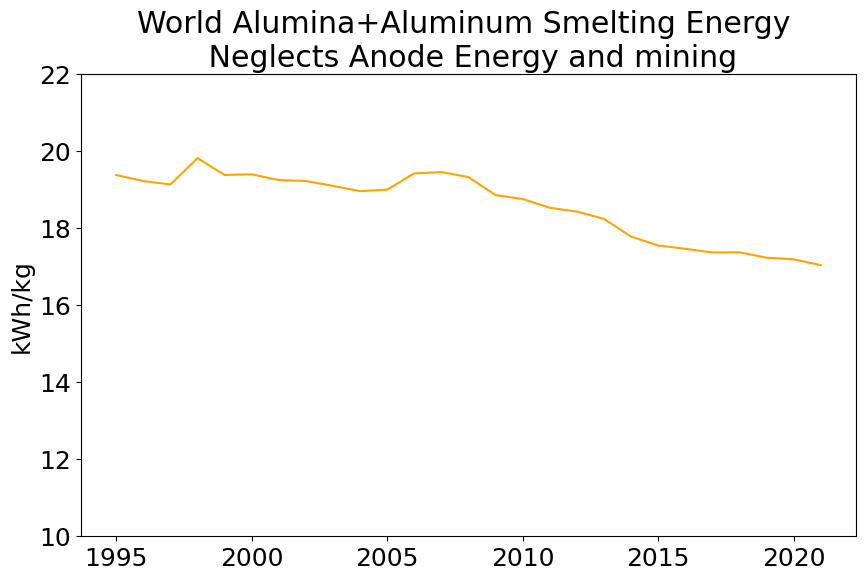

In [8]:
plt.plot(IAI_refinesmelt_world, color='orange')
plt.title('World Alumina+Aluminum Smelting Energy \n Neglects Anode Energy and mining')
plt.ylabel('kWh/kg')
plt.ylim(10,22)

In [14]:
#create a percentage of each energy (alumina vs aluminium) by country
IAI_aluminumSmelt_kWhpkg = IAI_aluminumSmelt_totE/1000 #this was in kWh/tonne


In [15]:
IAI_alumina_kwhpkg+IAI_aluminumSmelt_kWhpkg

,Africa,Africa & Asia (ex China),Asia (ex China),China,Europe,Gulf Cooperation Council,North America,Oceania,South America,World
year,,,,,,,,,,
1995,NaN,NaN,NaN,NaN,18.961504,NaN,19.527026,18.653988,19.159894,19.382852
1996,NaN,NaN,NaN,NaN,18.768790,NaN,19.501904,18.622550,19.171466,19.227295
1997,NaN,NaN,NaN,NaN,19.004441,NaN,19.138561,18.594101,19.000840,19.137540
1998,NaN,NaN,NaN,26.756506,19.166709,NaN,19.001642,18.626390,19.330389,19.822006
1999,NaN,NaN,NaN,26.232801,18.770609,NaN,18.501512,18.174403,18.591589,19.384740
2000,NaN,NaN,NaN,25.377339,18.748518,NaN,19.008316,17.836449,18.662463,19.401818
2001,NaN,NaN,NaN,25.132849,18.884345,NaN,18.479387,17.949143,18.515620,19.252232
2002,NaN,NaN,NaN,24.789360,19.097173,NaN,18.544459,17.664838,18.482777,19.227646
2003,NaN,NaN,NaN,24.082352,18.558042,NaN,18.563428,18.043586,18.444802,19.101396


In [18]:
IAI_aluminumSmelt_kWhpkg.add(IAI_alumina_kwhpkg)

,Africa,Africa & Asia (ex China),Asia (ex China),China,Europe,Gulf Cooperation Council,North America,Oceania,South America,World
year,,,,,,,,,,
1995,NaN,NaN,NaN,NaN,18.961504,NaN,19.527026,18.653988,19.159894,19.382852
1996,NaN,NaN,NaN,NaN,18.768790,NaN,19.501904,18.622550,19.171466,19.227295
1997,NaN,NaN,NaN,NaN,19.004441,NaN,19.138561,18.594101,19.000840,19.137540
1998,NaN,NaN,NaN,26.756506,19.166709,NaN,19.001642,18.626390,19.330389,19.822006
1999,NaN,NaN,NaN,26.232801,18.770609,NaN,18.501512,18.174403,18.591589,19.384740
2000,NaN,NaN,NaN,25.377339,18.748518,NaN,19.008316,17.836449,18.662463,19.401818
2001,NaN,NaN,NaN,25.132849,18.884345,NaN,18.479387,17.949143,18.515620,19.252232
2002,NaN,NaN,NaN,24.789360,19.097173,NaN,18.544459,17.664838,18.482777,19.227646
2003,NaN,NaN,NaN,24.082352,18.558042,NaN,18.563428,18.043586,18.444802,19.101396


In [16]:
IAI_aluminumSmelt_kWhpkg.columns

Index(['Africa', 'North America', 'South America', 'Asia (ex China)', 'Europe',
       'Oceania', 'Gulf Cooperation Council', 'China', 'World'],
      dtype='object')

In [17]:
IAI_alumina_kwhpkg.columns

Index(['Africa & Asia (ex China)', 'North America', 'South America', 'Europe',
       'Oceania', 'China', 'World'],
      dtype='object')